In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tqdm.notebook as tqdm
tf.config.list_physical_devices(device_type='GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import lib_stylegan
lib_stylegan.style_gan.logging.start_logging()

im_size = 128
batch_size = 4
latent_size = 256 #512
channels = 24 # Should be at least 32 for good results
#Chosing the number of layer this way, means we start with 4x4

model = lib_stylegan.style_gan.StyleGan(im_size=im_size, 
                                        latent_size=latent_size,
                                        nb_style_mapper_layer=4, #6
                                        channels=channels)

#dataset = lib_stylegan.dataset.train_dataset('/home/leo/Downloads/dogs-face-2015/*.jpg', 
dataset = lib_stylegan.dataset.train_dataset('/Data/dataset/dogs_full_dataset/*.jpg', 
                                             batch_size=batch_size,
                                            im_size=im_size)

model.compile(run_eagerly=True)

Number of train images found: 45501


In [ ]:
def to_numpy(d):
    return {k:d[k].numpy() for k in d}

nb = 45501
res_train = []
res_logs = []
for x in tqdm.tqdm(dataset.take(nb), total=nb):
    res_train.append(to_numpy(model.train_step(x)))
    res_logs.append(to_numpy(lib_stylegan.style_gan.logging.get_logs()))

  0%|          | 0/45501 [00:00<?, ?it/s]

In [ ]:
def evaluate(M,S,G):
  #Generating 9 test examples
  l_z, _, _, noise = model.get_noise(tf.ones((9,)))
  #model.M map the lattent vector z to w (Notation from the article).
  l_w = M(l_z)
  style = tf.stack([l_w for i in range(model.n_layers)],axis=1)
  #The seed is what the generator start with, in this case, a learnt constant
  seed = S(style)
  #From the seed, the style w and the noise, model.G generate an image.
  generated = G([seed, style, noise])
  #paking them together
  img = tf.concat([tf.concat([generated[3*i+k] for k in range(3)], axis=1) 
                                  for i in range(3)], axis=0)
  return img.numpy()

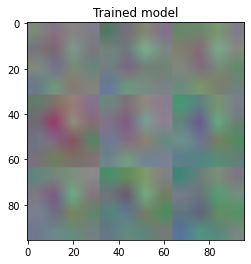

Epoch 1/5
79/79 [==============================] - 43s 541ms/step - disc_loss: 7.2080 - gen_loss: -0.0543 - divergence: 2.4518 - pl_lengths: 0.1429
Epoch 2/5
79/79 [==============================] - 37s 464ms/step - disc_loss: 3.1251 - gen_loss: 0.3521 - divergence: 1.1162 - pl_lengths: 0.1785
Epoch 3/5
79/79 [==============================] - 37s 466ms/step - disc_loss: 2.5444 - gen_loss: 0.3608 - divergence: 1.1283 - pl_lengths: 0.1781
Epoch 4/5
79/79 [==============================] - 37s 463ms/step - disc_loss: 2.1920 - gen_loss: 0.4523 - divergence: 1.0291 - pl_lengths: 0.1824
Epoch 5/5
79/79 [==============================] - 38s 477ms/step - disc_loss: 2.2025 - gen_loss: 0.4563 - divergence: 1.2346 - pl_lengths: 0.1900


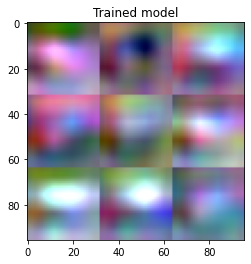

Epoch 1/5
79/79 [==============================] - 36s 461ms/step - disc_loss: 2.1129 - gen_loss: 0.5467 - divergence: 1.2288 - pl_lengths: 0.2003
Epoch 2/5
79/79 [==============================] - 37s 463ms/step - disc_loss: 2.1201 - gen_loss: 0.5159 - divergence: 1.3276 - pl_lengths: 0.2088
Epoch 3/5
79/79 [==============================] - 36s 462ms/step - disc_loss: 1.9970 - gen_loss: 0.5111 - divergence: 1.2111 - pl_lengths: 0.2155
Epoch 4/5
79/79 [==============================] - 37s 468ms/step - disc_loss: 2.0036 - gen_loss: 0.4529 - divergence: 1.2652 - pl_lengths: 0.2240
Epoch 5/5
79/79 [==============================] - 36s 455ms/step - disc_loss: 1.9303 - gen_loss: 0.4903 - divergence: 1.2149 - pl_lengths: 0.2310


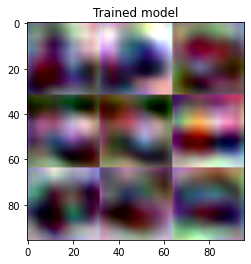

Epoch 1/5
79/79 [==============================] - 36s 455ms/step - disc_loss: 1.9415 - gen_loss: 0.4812 - divergence: 1.2874 - pl_lengths: 0.2375
Epoch 2/5
79/79 [==============================] - 36s 452ms/step - disc_loss: 1.9176 - gen_loss: 0.4507 - divergence: 1.2946 - pl_lengths: 0.2433
Epoch 3/5
79/79 [==============================] - 36s 461ms/step - disc_loss: 1.9233 - gen_loss: 0.4385 - divergence: 1.4194 - pl_lengths: 0.2475
Epoch 4/5
79/79 [==============================] - 35s 447ms/step - disc_loss: 1.7461 - gen_loss: 0.4273 - divergence: 1.3535 - pl_lengths: 0.2497
Epoch 5/5
79/79 [==============================] - 35s 447ms/step - disc_loss: 1.7753 - gen_loss: 0.3544 - divergence: 1.3742 - pl_lengths: 0.2512


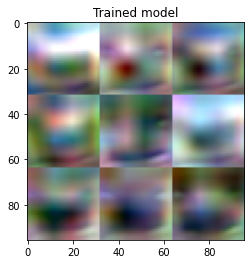

Epoch 1/5
79/79 [==============================] - 35s 446ms/step - disc_loss: 1.6958 - gen_loss: 0.4557 - divergence: 1.2953 - pl_lengths: 0.2568
Epoch 2/5
79/79 [==============================] - 35s 447ms/step - disc_loss: 1.7241 - gen_loss: 0.3842 - divergence: 1.2856 - pl_lengths: 0.2583
Epoch 3/5
79/79 [==============================] - 35s 445ms/step - disc_loss: 1.8214 - gen_loss: 0.3906 - divergence: 1.4231 - pl_lengths: 0.2610
Epoch 4/5
79/79 [==============================] - 35s 443ms/step - disc_loss: 1.7815 - gen_loss: 0.3619 - divergence: 1.3765 - pl_lengths: 0.2644
Epoch 5/5
79/79 [==============================] - 35s 447ms/step - disc_loss: 1.7706 - gen_loss: 0.3298 - divergence: 1.3717 - pl_lengths: 0.2655


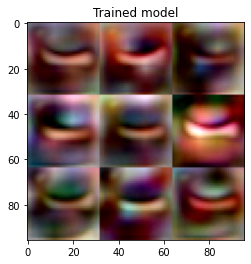

Epoch 1/5
79/79 [==============================] - 35s 445ms/step - disc_loss: 1.7258 - gen_loss: 0.4342 - divergence: 1.2646 - pl_lengths: 0.2644
Epoch 2/5
79/79 [==============================] - 36s 452ms/step - disc_loss: 1.7828 - gen_loss: 0.4405 - divergence: 1.3628 - pl_lengths: 0.2654
Epoch 3/5
79/79 [==============================] - 35s 441ms/step - disc_loss: 1.7365 - gen_loss: 0.3583 - divergence: 1.3631 - pl_lengths: 0.2639
Epoch 4/5
79/79 [==============================] - 35s 442ms/step - disc_loss: 1.7876 - gen_loss: 0.3161 - divergence: 1.3840 - pl_lengths: 0.2627
Epoch 5/5
79/79 [==============================] - 35s 447ms/step - disc_loss: 1.7612 - gen_loss: 0.3463 - divergence: 1.3759 - pl_lengths: 0.2664


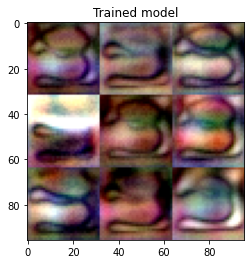

Epoch 1/5
79/79 [==============================] - 35s 447ms/step - disc_loss: 1.8572 - gen_loss: 0.3230 - divergence: 1.5062 - pl_lengths: 0.2681
Epoch 2/5
79/79 [==============================] - 35s 443ms/step - disc_loss: 1.8591 - gen_loss: 0.2692 - divergence: 1.5397 - pl_lengths: 0.2718
Epoch 3/5
79/79 [==============================] - 35s 438ms/step - disc_loss: 1.8668 - gen_loss: 0.2174 - divergence: 1.5758 - pl_lengths: 0.2722
Epoch 4/5
79/79 [==============================] - 35s 440ms/step - disc_loss: 1.8596 - gen_loss: 0.2700 - divergence: 1.5461 - pl_lengths: 0.2755
Epoch 5/5
79/79 [==============================] - 35s 440ms/step - disc_loss: 1.8909 - gen_loss: 0.2356 - divergence: 1.6169 - pl_lengths: 0.2777


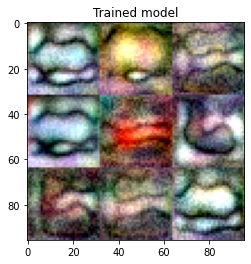

Epoch 1/5
79/79 [==============================] - 36s 452ms/step - disc_loss: 1.9140 - gen_loss: 0.2071 - divergence: 1.6640 - pl_lengths: 0.2819
Epoch 2/5
79/79 [==============================] - 35s 438ms/step - disc_loss: 1.8899 - gen_loss: 0.2222 - divergence: 1.6453 - pl_lengths: 0.2849
Epoch 3/5
79/79 [==============================] - 35s 438ms/step - disc_loss: 1.9080 - gen_loss: 0.2424 - divergence: 1.6713 - pl_lengths: 0.2879
Epoch 4/5
79/79 [==============================] - 35s 441ms/step - disc_loss: 1.8696 - gen_loss: 0.2026 - divergence: 1.6432 - pl_lengths: 0.2870
Epoch 5/5
79/79 [==============================] - 34s 435ms/step - disc_loss: 1.8692 - gen_loss: 0.2778 - divergence: 1.6282 - pl_lengths: 0.2879


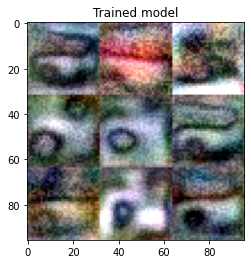

Epoch 1/5
79/79 [==============================] - 35s 438ms/step - disc_loss: 1.8944 - gen_loss: 0.1795 - divergence: 1.6701 - pl_lengths: 0.2898
Epoch 2/5
79/79 [==============================] - 34s 436ms/step - disc_loss: 1.8873 - gen_loss: 0.1705 - divergence: 1.6683 - pl_lengths: 0.2907
Epoch 3/5
79/79 [==============================] - 35s 437ms/step - disc_loss: 1.8580 - gen_loss: 0.2056 - divergence: 1.6410 - pl_lengths: 0.2937
Epoch 4/5
79/79 [==============================] - 35s 442ms/step - disc_loss: 1.8944 - gen_loss: 0.1886 - divergence: 1.6673 - pl_lengths: 0.2928
Epoch 5/5
79/79 [==============================] - 35s 440ms/step - disc_loss: 1.8737 - gen_loss: 0.2215 - divergence: 1.6610 - pl_lengths: 0.2930


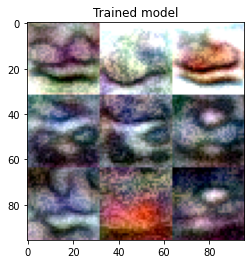

Epoch 1/5
79/79 [==============================] - 34s 436ms/step - disc_loss: 1.8784 - gen_loss: 0.1738 - divergence: 1.6540 - pl_lengths: 0.2921
Epoch 2/5
79/79 [==============================] - 34s 436ms/step - disc_loss: 1.8715 - gen_loss: 0.1460 - divergence: 1.6632 - pl_lengths: 0.2935
Epoch 3/5
79/79 [==============================] - 35s 440ms/step - disc_loss: 1.9108 - gen_loss: 0.1883 - divergence: 1.6933 - pl_lengths: 0.2948
Epoch 4/5
79/79 [==============================] - 34s 436ms/step - disc_loss: 1.8992 - gen_loss: 0.1771 - divergence: 1.7010 - pl_lengths: 0.2944
Epoch 5/5
79/79 [==============================] - 35s 437ms/step - disc_loss: 1.9027 - gen_loss: 0.1991 - divergence: 1.6842 - pl_lengths: 0.2927


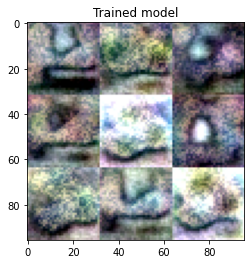

Epoch 1/5
79/79 [==============================] - 34s 435ms/step - disc_loss: 1.8892 - gen_loss: 0.2362 - divergence: 1.6984 - pl_lengths: 0.2927
Epoch 2/5
79/79 [==============================] - 35s 437ms/step - disc_loss: 1.9028 - gen_loss: 0.1767 - divergence: 1.6962 - pl_lengths: 0.2916
Epoch 3/5
79/79 [==============================] - 35s 448ms/step - disc_loss: 1.9084 - gen_loss: 0.1829 - divergence: 1.7167 - pl_lengths: 0.2888
Epoch 4/5
79/79 [==============================] - 34s 436ms/step - disc_loss: 1.8983 - gen_loss: 0.2010 - divergence: 1.6896 - pl_lengths: 0.2901
Epoch 5/5
79/79 [==============================] - 35s 437ms/step - disc_loss: 1.8970 - gen_loss: 0.1735 - divergence: 1.6920 - pl_lengths: 0.2897


In [ ]:

for i in range(10):
  #Generating 9 test examples
  plt.imshow(evaluate(model.M,model.S,model.G))
  plt.title("Trained model")
  plt.show()

  #We manually define the number of steps per epoch as the training dataset is
  #an infinite loop.
  model.fit(dataset, epochs=5)
  model.save_weights("model.tf")

In [ ]:
import tqdm.notebook as tqdm
"""
In order to improve the quality of the gereated images, 
we can take an exponential moving average of the model during training
"""

ema_steps = 1000
model.init_ema()
for images in tqdm.tqdm(dataset.repeat().take(ema_steps), total=ema_steps):
  model.train_step(images)
  model.ema_step()

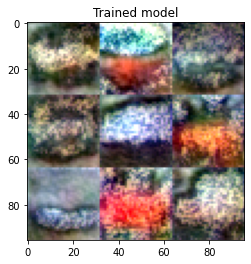

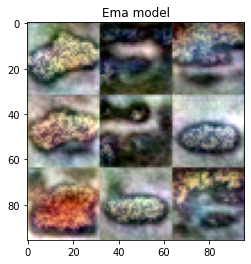

In [ ]:
plt.imshow(evaluate(model.M,model.S,model.G))
plt.title("Trained model")
plt.show()

plt.imshow(evaluate(model.ema_M,model.ema_S,model.ema_G))
plt.title("Ema model")
plt.show()

For better training, the model needs to be tained much longer